In [1]:
"""
Import
"""
from matplotlib.colors import ListedColormap, BoundaryNorm, TwoSlopeNorm, LinearSegmentedColormap
import matplotlib.cm as cm
import matplotlib.lines as mlines
from typing import List
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import xarray as xr
import re
import os
import glob
import sys
from datetime import datetime, timedelta
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy.ma as ma
import cartopy.crs as ccrs  # Import cartopy ccrs
import cartopy.feature as cfeature  # Import cartopy common features
from matplotlib import animation
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
import scipy.stats
import math
import time as time_mod

sys.path.insert(0, "/home/chalifour/code/master")
from fct_script.func_py import get_proj_extent
import fct_script.rpn_funcs_chris as rpn_chris
from fct_script.get_domain import get_domain_info
from fct_script.func_py import get_colormap_precip, categorical_cmap
from matplotlib.patches import Patch

# from func_py import get_proj_extent
from scipy import stats
import matplotlib.patheffects as pe
try:
    import rpnpy.librmn.all as rmn  # Module to read RPN files
    from rotated_lat_lon import RotatedLatLon  # Module to project field on native grid (created by Sasha Huziy)
except ImportError as err:
    print(f"RPNPY can only be use on the server. It can't be use on a personal computer."
          f"\nError throw :{err}")


In [2]:

begin_1, end_1 = '2020-10', '2021-04'
begin_2, end_2 = '2021-10', '2022-04'
begin_date_2, end_date_2 = datetime.strptime(begin_2, '%Y-%m'), datetime.strptime(end_2, '%Y-%m')
begin_date_1, end_date_1 = datetime.strptime(begin_1, '%Y-%m'), datetime.strptime(end_1, '%Y-%m')
timerange_month_1 = pd.date_range(begin_1, end_1, freq='MS')
timerange_day_1 = pd.date_range(begin_1, end_1, freq='D')
timerange_month_2 = pd.date_range(begin_2, end_2, freq='MS')
timerange_day_2 = pd.date_range(begin_2, end_2, freq='D')

In [3]:
lonlat_path = '/upslope/chalifour/code_fig_bassin_domaine/Disdrometres_coordonnées.csv'
df_disdro = pd.read_csv(lonlat_path, header=0)
df_disdro.set_index('Name', inplace=True)
data_path = sorted(glob.glob(fr"/upslope/chalifour/projet_maitrise/"))[0]
HQ_compiled_savepath = os.path.join(data_path, r"data_format-master/Data.nosync/station_gmon/Full_datasets")
file_1h = glob.glob(HQ_compiled_savepath + '/dataset_1h.csv')

In [4]:
path_save_df = '/upslope/chalifour/projet_maitrise/dataframe_obs_formated'
# Obs

dataframe_1h_obs = pd.read_csv(path_save_df + f'/dataframe_1h_stat_formated_2year.csv',
                               parse_dates=['date'])

dataframe_1h_obs.set_index('date', inplace=True)

dataframe_11km_obs = pd.read_csv(path_save_df + f'/dataframe_11kmP3_stat_formated_2year.csv',
                                 parse_dates=['time'])
dataframe_11km_obs.set_index('time', inplace=True)
dataframe_2p5km_obs = pd.read_csv(
    path_save_df + f'/dataframe_2p5kmP3_stat_formated_2year.csv', parse_dates=['time'])
dataframe_2p5km_obs.set_index('time', inplace=True)
# dataframe_era5_obs = pd.read_csv(path_save_df + f'/dataframe_ERA5_stat_formated_{begin_date.year}_{end_date.year}.csv',
#                                  parse_dates=['time'])
# dataframe_era5_obs.set_index('time', inplace=True)
# dict = {'filename': 'filename', 'TT': 'TT', 'LIQUID': 'frac_liquide', 'FR': 'frac_FZ', 'MIXFR': 'frac_mix_fr',
#         'MIX': 'frac_mix', 'SOLID': 'frac_solide'}
# call rename () method
# dataframe_era5_obs.rename(columns=dict,
#                           inplace=True)

dataframe_1h_obs_capa = pd.read_csv(f'/upslope/chalifour/projet_maitrise/data_sim_station/closest_point/dataset_stat_sim_capa_2020-09_2022-06.csv',parse_dates=['time'])
dataframe_1h_obs_capa.set_index('time', inplace=True)
dataframe_1h_obs_capa = dataframe_1h_obs_capa.loc[begin_1:end_2]
# list_capa=[]
# for stat,subdf in dataframe_1h_obs_capa.groupby('filename'):

   # list_capa.append(subdf.loc[begin:end])
# dataframe_1h_obs_capa = pd.concat(list_capa)

dict_obs = {'frac_liquid': 'frac_liquide'}
# call rename () method
dataframe_1h_obs.rename(columns=dict_obs,
                        inplace=True)

# uqam
dataframe_1h_uqam = pd.read_csv(path_save_df + f'/dataframe_uqam_formated_2year.csv',
                                parse_dates=['date'])
dataframe_1h_uqam.set_index('date', inplace=True)
dataframe_1h_uqam.rename(columns=dict_obs,
                         inplace=True)

dataframe_11km_uqammomo = pd.read_csv(
    path_save_df + f'/dataframe_11kmP3_Umomo_stat_formated_2year.csv', parse_dates=['time'])
dataframe_11km_uqammomo.set_index('time', inplace=True)
dataframe_2p5km_uqammomo = pd.read_csv(
    path_save_df + f'/dataframe_2p5kmP3_Umomo_stat_formated_2year.csv', parse_dates=['time'])
dataframe_2p5km_uqammomo.set_index('time', inplace=True)
# dataframe_era5_uqammomo = pd.read_csv(
#     path_save_df + f'/dataframe_ERA5_uqammomo_formated_{begin_date.year}_{end_date.year}.csv', parse_dates=['time'])
# dataframe_era5_uqammomo.set_index('time', inplace=True)
#
# dataframe_era5_uqammomo.rename(columns=dict,
#                                inplace=True)
dataframe_uqammomo_capa = pd.read_csv(f'/upslope/chalifour/projet_maitrise/data_sim_station/closest_point/dataset_UQAM_MOMO_capa_2020-09_2022-06.csv',parse_dates=['time'])
dataframe_uqammomo_capa.set_index('time', inplace=True)
dataframe_uqammomo_capa = dataframe_uqammomo_capa.loc[begin_1:end_2]
dataframe_11kmuqam = dataframe_11km_uqammomo.loc[dataframe_11km_uqammomo['filename'] == 'UQAM_PK']
dataframe_2p5kmuqam = dataframe_2p5km_uqammomo.loc[dataframe_2p5km_uqammomo['filename'] == 'UQAM_PK']
# dataframe_era5uqam = dataframe_era5_uqammomo.loc[dataframe_era5_uqammomo['filename'] == 'UQAM_PK']
dataframe_capauqam = dataframe_uqammomo_capa.loc[dataframe_uqammomo_capa['filename'] == 'UQAM_PK']
# dataframe_capauqam = dataframe_capauqam.loc[begin:end]
# momo

dataframe_1h_momo = pd.read_csv(path_save_df + f'/dataframe_momo_formated_2year.csv',
                                parse_dates=['date'])
dataframe_1h_momo.set_index('date', inplace=True)
dataframe_1h_momo.rename(columns=dict_obs,
                         inplace=True)

dataframe_11kmmomo = dataframe_11km_uqammomo.loc[dataframe_11km_uqammomo['filename'] == 'NEIGE']
dataframe_2p5kmmomo = dataframe_2p5km_uqammomo.loc[dataframe_2p5km_uqammomo['filename'] == 'NEIGE']
# dataframe_era5momo = dataframe_era5_uqammomo.loc[dataframe_era5_uqammomo['filename'] == 'NEIGE']
dataframe_capamomo = dataframe_uqammomo_capa.loc[dataframe_uqammomo_capa['filename'] == 'NEIGE']
# dataframe_capamomo = dataframe_capamomo.loc[begin:end]

In [5]:
# for stat,subdf in dataframe_1h_obs.groupby('filename'):
#
#     prcp_capa = dataframe_1h_obs_capa.loc[dataframe_1h_obs_capa['filename']==stat]
#
#     plt.plot(subdf.index,subdf['precip_inst_pluvio'].cumsum())
#     plt.plot(prcp_capa.index,prcp_capa['PR'].cumsum())
#     plt.show()


In [6]:
def reorder_eventNumbers_dryStart(event_numbers):

    if event_numbers % 2 !=0:
        return event_numbers/2
    else:
        return np.NaN

def reorder_eventNumbers_rainStart (event_numbers):

    if event_numbers % 2 ==0:
        return event_numbers/2
    else:
        return np.NaN

In [7]:
def find_event(dataframe:pd.DataFrame,station:str):


    subdf_event = dataframe.copy()
    precip_trsh = 0.2
    if station == 'NEIGE':
        subdf_event.loc[subdf_event['precip_inst_geonor']>=precip_trsh,'prec_ind'] = 1
        subdf_event.loc[subdf_event['precip_inst_geonor']<precip_trsh,'prec_ind'] = 0
    else :
        subdf_event.loc[subdf_event['precip_inst_pluvio']>=precip_trsh,'prec_ind'] = 1
        subdf_event.loc[subdf_event['precip_inst_pluvio']<precip_trsh,'prec_ind'] = 0

    gap_to_ignore = 1
    subdf_event['event_ind']=subdf_event['prec_ind'].rolling(window=int(1+2*gap_to_ignore), center=True).max().dropna()

    subdf_event['event_no'] = (subdf_event['event_ind'].shift(1) != subdf_event['event_ind']).astype(int).cumsum()

    if subdf_event.loc[subdf_event.index[1], 'event_ind']==1.:
        subdf_event['event_no']=subdf_event['event_no'].apply(reorder_eventNumbers_rainStart)
    elif subdf_event.loc[subdf_event.index[1], 'event_ind']==0.:
        subdf_event['event_no']=subdf_event['event_no'].apply(reorder_eventNumbers_dryStart)

    rainEvents = subdf_event.groupby('event_no')

    # groups_ld=[]
    # list_phase_stat_ld = []
    # groups_sd=[]
    # list_phase_stat_sd = []

    prece_group=[]
    list_event = []
    list_rolling_event =[]
    i=1
    for name, group in rainEvents:
        if name == 0.5:
            pass
        else:
            if len(list_rolling_event)==0 and np.sum(group['prec_ind']) !=0:
                prece_group = group
                list_rolling_event.append(group)
            else:
                if np.sum(group['prec_ind']) ==0:
                    pass
                else:
                    time_0 = group.index[0]
                    if time_0 <= prece_group.index[-1]+pd.Timedelta('6H'):
                        prece_group = group
                        list_rolling_event.append(group)
                    else:
                        event = pd.concat(list_rolling_event)
                        event['event_no'] = i

                        i+=1
                        list_event.append(event)

                        list_rolling_event = []
                        list_rolling_event.append(group)
                        prece_group = group



    # rainEvents_corrected_ld = pd.concat(groups_ld).loc[:,phase_list_to_dict]
    # rainEvents_corrected_sd = pd.concat(groups_sd).loc[:,phase_list_to_dict]
    return list_event


def find_event_sim(dataframe:pd.DataFrame):


    subdf_event = dataframe.copy()
    precip_trsh = 0.2


    subdf_event.loc[subdf_event['PR']>=precip_trsh,'prec_ind'] = 1
    subdf_event.loc[subdf_event['PR']<precip_trsh,'prec_ind'] = 0


    gap_to_ignore = 1
    subdf_event['event_ind']=subdf_event['prec_ind'].rolling(window=(1+2*gap_to_ignore), center=True).max().dropna()

    subdf_event['event_no'] = (subdf_event['event_ind'].shift(1) != subdf_event['event_ind']).astype(int).cumsum()

    if subdf_event.loc[subdf_event.index[1], 'event_ind']==1.:
        subdf_event['event_no']=subdf_event['event_no'].apply(reorder_eventNumbers_rainStart)
    elif subdf_event.loc[subdf_event.index[1], 'event_ind']==0.:
        subdf_event['event_no']=subdf_event['event_no'].apply(reorder_eventNumbers_dryStart)

    rainEvents = subdf_event.groupby('event_no')
    # groups_ld=[]
    # list_phase_stat_ld = []
    # groups_sd=[]
    # list_phase_stat_sd = []

    prece_group=[]
    list_event = []
    list_rolling_event =[]
    i=1
    for name, group in rainEvents:

        if name == 0.5:
            pass
        else:
            if len(list_rolling_event)==0:
                prece_group = group
                list_rolling_event.append(group)
            else:
                time_0 = group.index[0]
                if (group.index[-1]-group.index[0])/pd.Timedelta('1 hour') > 100 and (group.index[-2]-group.index[0])/pd.Timedelta('1 hour') < 100:
                    group = group.iloc[:-1]
                if time_0 <= prece_group.index[-1]+pd.Timedelta('6H') :
                    prece_group = group
                    list_rolling_event.append(group)
                else:
                    event = pd.concat(list_rolling_event)
                    event['event_no'] = i
                    i+=1
                    list_event.append(event)

                    list_rolling_event = []
                    list_rolling_event.append(group)
                    prece_group = group

    return list_event


## Find Event

In [8]:



z_0=0.01 #m
d = 0.4 #m


# dict_phase_event_stat_ld={}
# idx_event_ld_stat = {}
# dict_phase_event_stat_sd={}
# idx_event_sd_stat = {}
idx_event_stat = {}
phase_list = ['frac_liquide','frac_solide', 'frac_FZ', 'frac_mix','frac_mix_fr']
phase_list_to_dict=['temp_moy','precip_inst_pluvio','frac_liquide','frac_solide', 'frac_FZ', 'frac_mix','frac_mix_fr','event_no']
for station, subdf in dataframe_1h_obs.groupby('filename'):

    list_event_subdf = find_event(subdf,station)
    idx_event_stat[station] = list_event_subdf

    # list_event_complete = []
    # for event in list_event_subdf:
    #     list_event_complete.append(subdf.loc[event.index[0]:event.index[-1]])
    # idx_event_stat[station] = list_event_complete

# UQAM
list_event_subdf = find_event(dataframe_1h_uqam,'UQAM_PK')
idx_event_stat['UQAM_PK'] = list_event_subdf

# list_event_complete = []
#
# for event in list_event_subdf:
#     list_event_complete.append(dataframe_1h_uqam.loc[event.index[0]:event.index[-1]])
#
# idx_event_stat['UQAM_PK'] = list_event_complete


# momo

list_event_subdf = find_event(dataframe_1h_momo,'NEIGE')
idx_event_stat['NEIGE'] = list_event_subdf

# list_event_complete = []
#
# for event in list_event_subdf:
#     list_event_complete.append(dataframe_1h_momo.loc[event.index[0]:event.index[-1]])
#
# idx_event_stat['NEIGE'] = list_event_complete


#find event mix
dict_event_mix = {}
for stat in idx_event_stat.keys():
    list_event = idx_event_stat[stat]
    dict_event_mix[stat] = []

    for event in list_event:

        if np.sum(event.frac_mix) >0 or np.sum(event.frac_mix_fr) >0 or np.sum(event.frac_FZ) > 0:
            dict_event_mix[stat].append(event)





In [9]:

dict_event_mix_12km = {}
dict_event_mix_2p5km = {}

for stat in dict_event_mix.keys():


    dict_event_mix_12km[stat] = []
    dict_event_mix_2p5km[stat] = []
    if re.search('NEIGE',stat):
        list_event = dict_event_mix[stat]

        for event in list_event:

            if np.sum(event.frac_mix) >0 or np.sum(event.frac_mix_fr) >0 or np.sum(event.frac_FZ) > 0:

                event_12km = dataframe_11kmmomo.loc[event.index]
                dict_event_mix_12km[stat].append(event_12km)
                event_2p5km = dataframe_2p5kmmomo.loc[event.index]
                dict_event_mix_2p5km[stat].append(event_2p5km)



    if re.search('UQAM_PK',stat):
        list_event = dict_event_mix[stat]
        for event in list_event:

            if np.sum(event.frac_mix) >0 or np.sum(event.frac_mix_fr) >0 or np.sum(event.frac_FZ) > 0:

                event_12km = dataframe_11kmuqam.loc[event.index]
                dict_event_mix_12km[stat].append(event_12km)

                event_2p5km = dataframe_2p5kmuqam.loc[event.index]
                dict_event_mix_2p5km[stat].append(event_2p5km)


    elif not re.search('NEIGE',stat) and not re.search('UQAM_PK',stat):
        list_event = dict_event_mix[stat]
        for event in list_event:

            if np.sum(event.frac_mix) >0 or np.sum(event.frac_mix_fr) >0 or np.sum(event.frac_FZ) > 0:

                subdf_11km = dataframe_11km_obs[dataframe_11km_obs['filename'] == stat]
                event_12km = subdf_11km.loc[event.index]


                dict_event_mix_12km[stat].append(event_12km)

                subdf_2p5km = dataframe_2p5km_obs[dataframe_2p5km_obs['filename'] == stat]
                event_2p5km = subdf_2p5km.loc[event.index]
                dict_event_mix_2p5km[stat].append(event_2p5km)


In [10]:
def FAR(array_sim,array_ref):

    mask_real = np.isfinite(array_sim) | np.isfinite(array_ref)
    # array_sim=array_sim[mask_real]
    # array_ref=array_ref[mask_real]

    an_sim = np.nan_to_num(array_sim/array_sim) * 2
    an_ref = np.nan_to_num(array_ref/array_ref)

    an_tot = an_sim+an_ref
    a = np.count_nonzero(an_tot == 3)
    b = np.count_nonzero(an_tot == 2)

    if np.sum(mask_real) < 30:
        FAR = np.nan

    elif a==0 and b ==0:
        FAR = np.nan
    else:
        FAR = b/(b+a)

    return FAR

def POD(array_sim,array_ref):

    mask_real = np.isfinite(array_sim) | np.isfinite(array_ref)
    # array_sim= array_sim[mask_real]
    # array_ref= array_ref[mask_real]

    an_sim = np.nan_to_num(array_sim/array_sim) * 2
    an_ref = np.nan_to_num(array_ref/array_ref)

    an_tot = an_sim+an_ref
    a = np.count_nonzero(an_tot == 3)
    c =  np.count_nonzero(an_tot == 1)
    if np.sum(mask_real) < 30:
        POD = np.nan
    elif c==0 and a ==0:
        POD = np.nan
    else:
        POD = (a)/(a+c)

    return POD

In [11]:

for stat in dict_event_mix.keys():
    list_event=dict_event_mix[stat]
    df_event_mix = pd.concat(list_event)

    list_event_11km = dict_event_mix_12km[stat]
    df_event_mix_11km = pd.concat(list_event_11km)

    list_event_2p5km=dict_event_mix_2p5km[stat]
    df_event_mix_2p5km = pd.concat(list_event_2p5km)

    pr_obs = np.sum(df_event_mix[['frac_solide','frac_liquide','frac_FZ','frac_mix','frac_mix_fr']],axis=1).values
    pr_obs_norm = np.nan_to_num(pr_obs/pr_obs)

    pr_11km = np.sum(df_event_mix_11km[['frac_solide','frac_liquide','frac_FZ','frac_mix','frac_mix_fr']],axis=1).values
    pr_11km_norm = np.nan_to_num(pr_11km/pr_11km)

    pr_2p5km = np.sum(df_event_mix_2p5km[['frac_solide','frac_liquide','frac_FZ','frac_mix','frac_mix_fr']],axis=1).values
    pr_2p5km_norm = np.nan_to_num(pr_2p5km/pr_2p5km)


    # print(f'{stat} Corr:\n12 km -> {np.corrcoef(pr_obs,pr_11km)[0, 1]}\n 2.5km -> {np.corrcoef(pr_obs,pr_2p5km)[0, 1]}\n\n')
    # print(f'{stat} Corr norm:\n12 km -> {np.corrcoef(pr_obs_norm,pr_11km_norm)[0, 1]}\n2.5km -> {np.corrcoef(pr_obs_norm,pr_2p5km_norm)[0, 1]}\n\n')
    # print(f'{stat} FAR norm:\n12 km -> {FAR(pr_11km_norm,pr_obs_norm)}\n2.5km -> {FAR(pr_2p5km_norm,pr_obs_norm)}\n\n')
    print(f'{stat} POD norm:\n12 km -> {POD(pr_11km_norm,pr_obs_norm)}\n2.5km -> {POD(pr_2p5km_norm,pr_obs_norm)}\n\n')

<ipython-input-11-ca6604121b98>:12: RuntimeWarning: invalid value encountered in true_divide
  pr_obs_norm = np.nan_to_num(pr_obs/pr_obs)
<ipython-input-11-ca6604121b98>:15: RuntimeWarning: invalid value encountered in true_divide
  pr_11km_norm = np.nan_to_num(pr_11km/pr_11km)
<ipython-input-11-ca6604121b98>:18: RuntimeWarning: invalid value encountered in true_divide
  pr_2p5km_norm = np.nan_to_num(pr_2p5km/pr_2p5km)
<ipython-input-10-bd340119b202>:30: RuntimeWarning: invalid value encountered in true_divide
  an_sim = np.nan_to_num(array_sim/array_sim) * 2
<ipython-input-10-bd340119b202>:31: RuntimeWarning: invalid value encountered in true_divide
  an_ref = np.nan_to_num(array_ref/array_ref)


AUXLOUPS POD norm:
12 km -> 0.6867924528301886
2.5km -> 0.5245283018867924


CABITUQG POD norm:
12 km -> 0.6084142394822006
2.5km -> 0.42071197411003236


LAFLAM_G POD norm:
12 km -> 0.6376021798365122
2.5km -> 0.5177111716621253


LBARDO_G POD norm:
12 km -> 0.7565217391304347
2.5km -> 0.6666666666666666


LEVASSEU POD norm:
12 km -> 0.6693766937669376
2.5km -> 0.5826558265582655


LOUIS POD norm:
12 km -> 0.7058823529411765
2.5km -> 0.5858823529411765


LOUISE_G POD norm:
12 km -> 0.7372400756143668
2.5km -> 0.5916824196597353


PARLEUR POD norm:
12 km -> 0.6102941176470589
2.5km -> 0.5441176470588235


PERDRIX POD norm:
12 km -> 0.7358490566037735
2.5km -> 0.6132075471698113


PORTO POD norm:
12 km -> 0.6659707724425887
2.5km -> 0.5594989561586639


ROUSSY_G POD norm:
12 km -> 0.7627118644067796
2.5km -> 0.6694915254237288


RTOULNUS POD norm:
12 km -> 0.7
2.5km -> 0.5711111111111111

SAUTEREL POD norm:
12 km -> 0.7227414330218068
2.5km -> 0.5700934579439252


WEYMOU_G POD norm:
12 

In [12]:
# lonlat_path = '/upslope/chalifour/code_fig_bassin_domaine/Disdrometres_coordonnées.csv'
# df_disdro = pd.read_csv(lonlat_path, header=0)
# df_disdro.set_index('Name', inplace=True)
# list_stat_lat_lon = []
# list_lon=[]
# list_lat=[]
# for stat in idx_event_stat.keys():
#     if stat not in ['UQAM_PK', 'MOMO']:
#         lon = df_disdro.loc[stat].X
#         lat = df_disdro.loc[stat].Y
#         list_lon.append(lon)
#         list_lat.append(lat)
#         list_stat_lat_lon.append(stat)
#
# list_order_stat = [x for _,x in sorted(zip(list_lat,list_stat_lat_lon))]
#
# phase_list_to_dict=['TT','frac_liquide','frac_solide', 'frac_FZ', 'frac_mix','frac_mix_fr','event_no']

In [13]:
# print('Long duration')
# for stat in list_order_stat:
#     print(f'{stat};{np.nanmean(dict_phase_event_stat_ld[stat])}')
#
# print('\nShort duration')
# for stat in list_order_stat:
#     print(f'{stat};{np.nanmean(dict_phase_event_stat_sd[stat])}')

In [14]:



# idx_event_era5 = {}
# # idx_event_sd_era5 = {}
#
#
# # print('Long duration')
# for station in list_order_stat:
#     # subdf = dataframe_era5_obs.loc[dataframe_era5_obs['filename']==station].copy()
#     subdf['event_no'] = idx_event_stat[station]['event_no']
#
#     rainEvents = subdf.groupby('event_no')
#
#     list_phase_era5 = []
#     for name, group in rainEvents:
#         list_phase_era5.append(group)
#
#     rainEvents_corrected_ld_era5 = pd.concat(list_phase_era5)
#
#     idx_event_era5[station] = rainEvents_corrected_ld_era5
#
#     # print(f'{station};{np.mean(list_phase_era5)}')
#
# # uqam
# subdf_uqam_ld = dataframe_era5uqam.copy()
# subdf_uqam_ld['event_no'] = idx_event_stat['UQAM_PK']['event_no']
# rainEvents = subdf_uqam_ld.groupby('event_no')
#
# list_phase_era5 = []
# for name, group in rainEvents:
#     list_phase_era5.append(group)
#
# rainEvents_corrected_era5 = pd.concat(list_phase_era5)
#
# idx_event_era5['UQAM_PK'] = rainEvents_corrected_era5
#
# # momo
# subdf_momo_ld = dataframe_era5uqam.copy()
# subdf_momo_ld['event_no'] = idx_event_stat['MOMO']['event_no']
# rainEvents = subdf_momo_ld.groupby('event_no')
#
# list_phase_era5 = []
# for name, group in rainEvents:
#     list_phase_era5.append(group)
#
# rainEvents_corrected_era5 = pd.concat(list_phase_era5)
#
# idx_event_era5['MOMO'] = rainEvents_corrected_era5



In [15]:

# 11 km

z_0=0.01 #m
d = 0.4 #m

idx_event_11km = {}

for station,subdf in dataframe_11km_obs.groupby('filename'):

    idx_event_11km[station] = find_event_sim(subdf)
    # subdf['event_no'] = idx_event_stat[station]['event_no']
    # rainEvents = subdf.groupby('event_no')
    #
    #
    # list_wind_11km = []
    # for name, group in rainEvents:
    #     list_wind_11km.append(group)
    #
    # rainEvents_corrected_11km = pd.concat(list_wind_11km)
    #
    # idx_event_11km[station] = rainEvents_corrected_11km


    # print(f'{station};{np.mean(list_wind_11km)}')



# uqam

idx_event_11km['UQAM_PK'] = find_event_sim(dataframe_11kmuqam)
# subdf_uqam_ld['event_no'] = idx_event_stat['UQAM_PK']['event_no']
# rainEvents = subdf_uqam_ld.groupby('event_no')

# list_wind_11km = []
# for name, group in rainEvents:
#
#     list_wind_11km.append(group)
#
# rainEvents_corrected_11km = pd.concat(list_wind_11km)
#
# idx_event_11km['UQAM_PK'] = rainEvents_corrected_11km

# momo
# subdf_momo_ld = dataframe_11kmmomo.copy()
idx_event_11km['NEIGE'] = find_event_sim(dataframe_11kmmomo)
for i in range(len(idx_event_11km['NEIGE'])):
    event = idx_event_11km['NEIGE'][i]
    if (event.index[-1]-event.index[0])/pd.Timedelta('1 hour')>500:
        initial_year = event.index[0].year
        initial_month = event.index[0].month
        final_year = event.index[-1].year
        final_month = event.index[-1].month

        event_1 = event.loc[f'{initial_year}-{initial_month}':f'{initial_year}-{initial_month+1}']
        event_2 = event.loc[f'{final_year}-{final_month}':f'{final_year}-{final_month+1}']

        idx_event_11km['NEIGE'][i] = event_1
        idx_event_11km['NEIGE'].append(event_2)
    else:
        pass

# for event in idx_event_11km['NEIGE']:
#     print(len(event.index))
#     if len(event.index) > 200:
#         print(event)
# subdf_momo_ld['event_no'] = idx_event_stat['MOMO']['event_no']
# rainEvents = subdf_momo_ld.groupby('event_no')
#
# list_wind_11km = []
# for name, group in rainEvents:
#     list_wind_11km.append(group)
#
# rainEvents_corrected_11km = pd.concat(list_wind_11km)
#
# idx_event_11km['MOMO'] = rainEvents_corrected_11km


In [16]:

# 2p5km

z_0=0.01 #m
d = 0.4 #m


idx_event_2p5km = {}

for station,subdf in dataframe_2p5km_obs.groupby('filename'):
    subdf = dataframe_2p5km_obs.loc[dataframe_2p5km_obs['filename']==station].copy()
    idx_event_2p5km[station] = find_event_sim(subdf)
    # mask_ld = idx_event_stat[station].index
    # subdf['event_no'] = idx_event_stat[station]['event_no']
    # rainEvents = subdf.groupby('event_no')
    # list_wind_2p5km = []
    # for name, group in rainEvents:
    #
    #     list_wind_2p5km.append(group)
    #
    # rainEvents_corrected_2p5km = pd.concat(list_wind_2p5km)
    #
    # idx_event_2p5km[station] = rainEvents_corrected_2p5km

# uqam
# subdf_uqam = dataframe_2p5kmuqam.copy()
idx_event_2p5km['UQAM_PK'] = find_event_sim(dataframe_2p5kmuqam)
# subdf_uqam['event_no'] = idx_event_stat['UQAM_PK']['event_no']
# rainEvents = subdf_uqam_ld.groupby('event_no')
#
# list_wind_2p5km = []
# for name, group in rainEvents:
#
#     list_wind_2p5km.append(group)
#
# rainEvents_corrected_2p5km = pd.concat(list_wind_2p5km)
#
# idx_event_2p5km['UQAM_PK'] = rainEvents_corrected_2p5km

# momo
# subdf_momo = dataframe_2p5kmmomo.copy()
idx_event_2p5km['NEIGE'] = find_event_sim(dataframe_2p5kmmomo)
# subdf_momo['event_no'] = idx_event_stat['MOMO']['event_no']
# rainEvents = subdf_momo.groupby('event_no')
#
# list_wind_2p5km = []
# for name, group in rainEvents:
#     list_wind_2p5km.append(group)
#
# rainEvents_corrected_2p5km = pd.concat(list_wind_2p5km)
#
# idx_event_2p5km['MOMO'] = rainEvents_corrected_2p5km


In [18]:
list_dt_obs_rain = []
list_dt_11km_rain = []
list_dt_2p5km_rain = []

list_dt_obs_snow = []
list_dt_11km_snow = []
list_dt_2p5km_snow = []

list_dt_obs_mix = []
list_dt_11km_mix = []
list_dt_2p5km_mix = []


list_qty_obs_rain = []
list_qty_11km_rain = []
list_qty_2p5km_rain = []

list_qty_obs_snow = []
list_qty_11km_snow = []
list_qty_2p5km_snow = []

list_qty_obs_mix = []
list_qty_11km_mix = []
list_qty_2p5km_mix = []

list_duree_mixte_obs = []
list_duree_mixte_11km = []
list_duree_mixte_2p5km = []

list_qty_mixte_obs = []
list_qty_mixte_11km = []
list_qty_mixte_2p5km = []

dt_max = 0
event_max = 0
int_max = 0
list_event_mix_neige = []

df_mix_neige = pd.DataFrame(columns=['begin','end','dt','dt_mix','max_mix_1h'])
# df_mix_neige.set_index('time',inplace=True)
# print(df_mix_neige)
for stat in idx_event_stat.keys():
    list_event = idx_event_stat[stat]

    for event in list_event:

        if stat == 'NEIGE':
            # event = event[event['precip_inst_geonor'] > 0]
            delta_t =(event.index[-1]-event.index[0])/pd.Timedelta('1 hour')

            if np.sum(event.frac_mix) >0 or np.sum(event.frac_mix_fr) >0 or np.sum(event.frac_FZ) > 0:
                list_qty_obs_mix.append(np.sum(event['precip_inst_geonor']))
                list_dt_obs_mix.append(delta_t)

                dt_mix = len(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0))].index)

                qty_mix = np.sum(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0)),'precip_inst_geonor'])
                int_mix = np.max(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0)),'precip_inst_geonor'])
                list_qty_mixte_obs.append(qty_mix)
                # print(f'{event.index[0]}, dt = {dt_mix:.1f}, max_prcp = {int_mix:.1f}')
                dict_to_add = {'begin': event.index[0],'end':event.index[-1],'dt':delta_t,'dt_mix':dt_mix,'max_mix_1h':int_mix,'mix_tot':qty_mix}
                df_mix_neige = df_mix_neige.append(dict_to_add,ignore_index = True)

                if (dt_mix >= dt_max) & (int_mix >= int_max) :
                    dt_max = dt_mix
                    event_max = event
                    list_event_mix_neige.append(event_max)
                    int_max=int_mix


                list_duree_mixte_obs.append(dt_mix)



            elif (np.sum(event.frac_liquide) > 0 and np.sum(event.frac_solide) == 0 and  np.sum(event.frac_mix) == 0 and np.sum(event.frac_mix_fr) ==0 and np.sum(event.frac_FZ) ==0) :
                list_qty_obs_rain.append(np.sum(event['precip_inst_geonor']))
                list_dt_obs_mix.append(delta_t)

            elif (np.sum(event.frac_solide) > 0 and np.sum(event.frac_liquide) == 0 and  np.sum(event.frac_mix) == 0 and np.sum(event.frac_mix_fr) ==0) or (np.sum(event.frac_solide) > 0 and np.sum(event.frac_FZ) == 0 and  np.sum(event.frac_mix) == 0 and np.sum(event.frac_mix_fr) ==0):
                list_qty_obs_snow.append(np.sum(event['precip_inst_geonor']))
                list_dt_obs_mix.append(delta_t)

            else:
                pass
                # list_qty_obs_mix.append(np.sum(event['precip_inst_geonor']))
                # list_dt_obs_mix.append(delta_t)
                # dt_mix = len(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0))].index)
                #
                # list_duree_mixte_obs.append(dt_mix)
        else:
            # event = event[event['precip_inst_pluvio'] > 0]


            delta_t =(event.index[-1]-event.index[0])/pd.Timedelta('1 hour')
            if np.sum(event.frac_mix) >0 or np.sum(event.frac_mix_fr) >0 or np.sum(event.frac_FZ) > 0:
                list_qty_obs_mix.append(np.sum(event['precip_inst_pluvio']))
                list_dt_obs_mix.append(delta_t)
                dt_mix = len(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0))].index)
                list_duree_mixte_obs.append(dt_mix)
                qty_mix = np.sum(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0)),'precip_inst_pluvio'])
                list_qty_mixte_obs.append(qty_mix)
            elif (np.sum(event.frac_liquide) > 0 and np.sum(event.frac_solide) == 0 and  np.sum(event.frac_mix) == 0 and np.sum(event.frac_mix_fr) ==0 and np.sum(event.frac_FZ) ==0):
                list_qty_obs_rain.append(np.sum(event['precip_inst_pluvio']))
                list_dt_obs_rain.append(delta_t)
            elif (np.sum(event.frac_solide) > 0 and np.sum(event.frac_liquide) == 0 and  np.sum(event.frac_mix) == 0 and np.sum(event.frac_mix_fr) ==0 and np.sum(event.frac_FZ) == 0):
                list_qty_obs_snow.append(np.sum(event['precip_inst_pluvio']))
                list_dt_obs_snow.append(delta_t)
            else:
                pass
                # list_qty_obs_mix.append(np.sum(event['precip_inst_pluvio']))
                # list_dt_obs_mix.append(delta_t)
                # dt_mix = len(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0))].index)
                #
                # list_duree_mixte_obs.append(dt_mix)

    # print(dt_max)
    # print(int_max)
    # print(event_max)
    list_event_11km = idx_event_11km[stat]

    for event in list_event_11km:
        # event = event[event.PR > 0]


        delta_t =(event.index[-1]-event.index[0])/pd.Timedelta('1 hour')
        if np.sum(event.frac_mix) >0 or np.sum(event.frac_mix_fr) >0 or np.sum(event.frac_FZ) > 0:
            list_qty_11km_mix.append(np.sum(event['PR']))
            list_dt_11km_mix.append(delta_t)
            dt_mix = len(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0))].index)
            list_duree_mixte_11km.append(dt_mix)
            qty_mix = np.sum(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0)),'PR'])
            list_qty_mixte_11km.append(qty_mix)
        elif (np.sum(event.frac_liquide) > 0 and np.sum(event.frac_solide) == 0 and  np.sum(event.frac_mix) == 0 and np.sum(event.frac_mix_fr) ==0 and np.sum(event.frac_FZ) ==0):
            list_qty_11km_rain.append(np.sum(event['PR']))
            list_dt_11km_rain.append(delta_t)
        elif (np.sum(event.frac_solide) > 0 and np.sum(event.frac_liquide) == 0 and  np.sum(event.frac_mix) == 0 and np.sum(event.frac_mix_fr) ==0 and np.sum(event.frac_FZ) ==0):
            list_qty_11km_snow.append(np.sum(event['PR']))
            list_dt_11km_snow.append(delta_t)
        else:
            pass
            # list_qty_11km_mix.append(np.sum(event['PR']))
            # list_dt_11km_mix.append(delta_t)
            # dt_mix = len(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0))].index)
            # list_duree_mixte_11km.append(dt_mix)



    list_event_2p5km = idx_event_2p5km[stat]

    for event in list_event_2p5km:
        # event = event[event.PR > 0]
        delta_t = (event.index[-1]-event.index[0])/pd.Timedelta('1 hour')

        if np.sum(event.frac_mix) >0 or np.sum(event.frac_mix_fr) >0 or np.sum(event.frac_FZ) > 0:
            list_qty_2p5km_mix.append(np.sum(event['PR']))
            list_dt_2p5km_mix.append(delta_t)

            dt_mix = len(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0))].index)
            list_duree_mixte_2p5km.append(dt_mix)

            qty_mix = np.sum(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0)),'PR'])
            list_qty_mixte_2p5km.append(qty_mix)
        elif (np.sum(event.frac_liquide) > 0 and np.sum(event.frac_solide) == 0 and  np.sum(event.frac_mix) == 0 and np.sum(event.frac_mix_fr) ==0 and np.sum(event.frac_FZ) ==0):
            list_qty_2p5km_rain.append(np.sum(event['PR']))
            list_dt_2p5km_rain.append(delta_t)
        elif (np.sum(event.frac_solide) > 0 and np.sum(event.frac_liquide) == 0 and  np.sum(event.frac_mix) == 0 and np.sum(event.frac_mix_fr) ==0 and np.sum(event.frac_FZ) ==0):
            list_qty_2p5km_snow.append(np.sum(event['PR']))
            list_dt_2p5km_snow.append(delta_t)
        else:
            pass
            # list_qty_2p5km_mix.append(np.sum(event['PR']))
            # list_dt_2p5km_mix.append(delta_t)
            # dt_mix = len(event.loc[((event.frac_mix >0) | (event.frac_mix_fr >0) | (event.frac_FZ > 0))].index)
            # list_duree_mixte_2p5km.append(dt_mix)

    # events_obs = pd.concat(list_event)
    # events_2p5km = pd.concat(list_event_2p5km)
    # events_12km = pd.concat(list_event_11km)
    # print()
    # plt.plot(events_obs.index,events_obs['precip_inst_pluvio'],alpha=0.5)
    # plt.plot(events_2p5km.index,events_2p5km['PR'],alpha=0.5)
    # plt.plot(events_12km.index,events_12km['PR'],alpha=0.5)
    # plt.show()
    # plt.close()
# print(list_event_mix_neige)

df_mix_neige.to_csv('/upslope/chalifour/projet_maitrise/data_site_neige/dataframe_event_neige.csv')



(array([204,  90,  54,  55,  33,  23,  15,  17,  11,   8,   5,   6,   2,
         5,   2,   1,   0,   2,   0,   0,   0,   0,   0,   0,   0,   1]), array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
       100]))
(array([256, 149, 106,  65,  68,  57,  45,  28,  25,  19,  17,  10,  12,
         5,   9,   9,   2,   3,   3,   1,   4,   2,   3,   0,   1,   1]), array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
       100]))
(array([214, 166,  92,  87,  55,  40,  44,  27,  26,  22,  14,  12,   9,
         3,   1,   3,   1,   3,   1,   0,   0,   0,   3,   1,   1,   0]), array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
       100]))
-14.08
-11.19

204.00
256.00
214.00


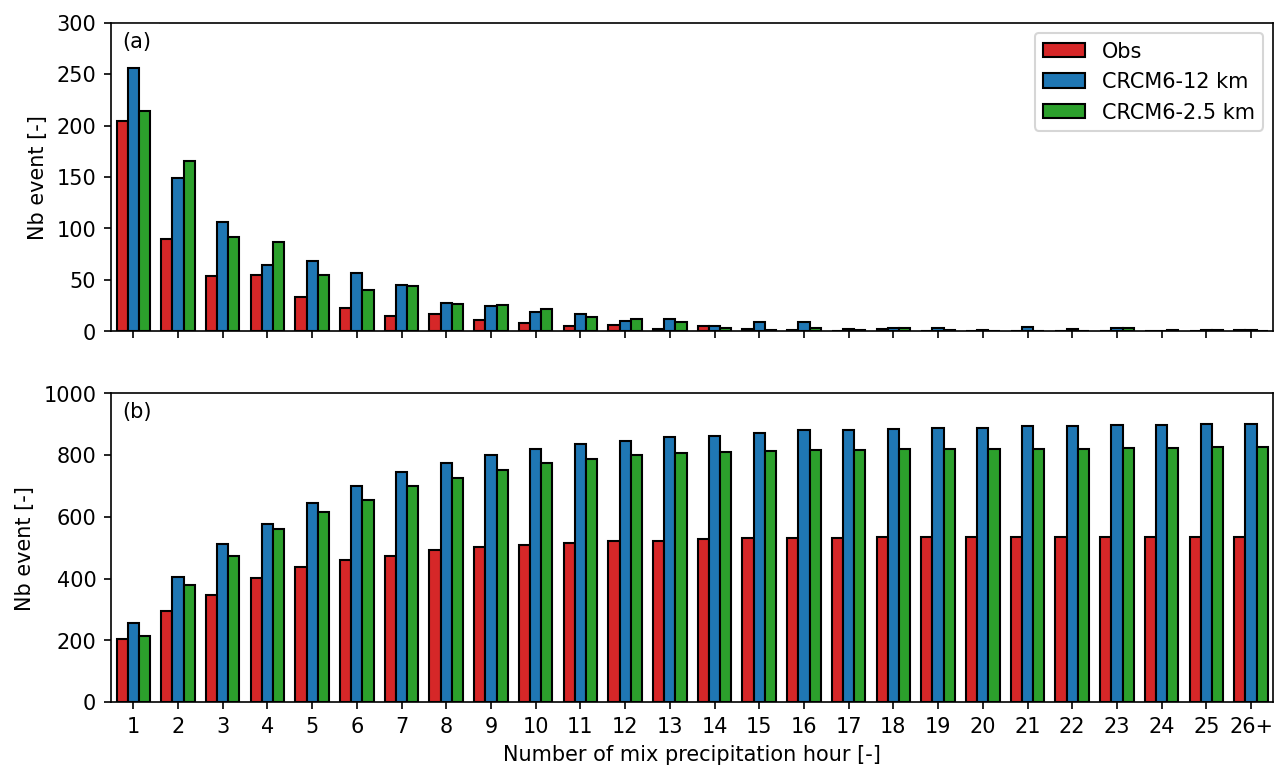

In [19]:
fig = plt.figure(facecolor='white', figsize=(10, 6), dpi=150)
spec = fig.add_gridspec(ncols=1, nrows=2)
ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])
# bins = np.arange(1,27,1)
bins = np.arange(1,27,1)
bins = np.append(bins,100)
hist_obs = np.histogram(np.array(list_duree_mixte_obs), bins=bins)

hist_11km = np.histogram(np.array(list_duree_mixte_11km), bins=bins)

hist_2p5km = np.histogram(np.array(list_duree_mixte_2p5km), bins=bins)
print(hist_obs)
print(hist_11km)
print(hist_2p5km)
print(f'{np.mean(hist_obs[0]-hist_11km[0]):.2f}')
print(f'{np.mean(hist_obs[0]-hist_2p5km[0]):.2f}')

# ax0.hlines(hist_obs[0],hist_obs[-1][:-1],hist_obs[-1][1:],colors='tab:red',linewidth=3,label='Obs')
# ax0.scatter(hist_obs[-1][:-1],hist_obs[0],facecolors='tab:red', edgecolors='tab:red',zorder=99,s=15)
# ax0.scatter(hist_obs[-1][1:],hist_obs[0],facecolors='none', edgecolors='tab:red',zorder=99,s=15)
#
# ax0.hlines(hist_11km[0],hist_11km[-1][:-1],hist_11km[-1][1:],colors='tab:blue',linewidth=3,label='12 km')
# ax0.scatter(hist_11km[-1][:-1],hist_11km[0],facecolors='tab:blue', edgecolors='tab:blue',zorder=99,s=15)
# ax0.scatter(hist_11km[-1][1:],hist_11km[0],facecolors='none', edgecolors='tab:blue',zorder=99,s=15)
#
# ax0.hlines(hist_2p5km[0],hist_2p5km[-1][:-1],hist_2p5km[-1][1:],colors='tab:green',linewidth=3,label='2.5 km')
# ax0.scatter(hist_2p5km[-1][:-1],hist_2p5km[0],facecolors='tab:green', edgecolors='tab:green',zorder=99,s=15)
# ax0.scatter(hist_2p5km[-1][1:],hist_2p5km[0],facecolors='none', edgecolors='tab:green',zorder=99,s=15)

# ax0.hist(np.array(list_dt_obs_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_11km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_2p5km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
width = 0.25

ax0.bar(hist_obs[1][:-1]-width,hist_obs[0],facecolor='tab:red',edgecolor='k',zorder=999,label='Obs',width=width)
ax0.bar(hist_obs[1][:-1],hist_11km[0],facecolor='tab:blue',edgecolor='k',zorder=999,label='CRCM6-12 km',width=width)
ax0.bar(hist_obs[1][:-1]+width,hist_2p5km[0],facecolor='tab:green',edgecolor='k',zorder=999,label='CRCM6-2.5 km',width=width)
print(f'\n{np.cumsum(hist_obs[0])[0]:.2f}')
print(f'{np.cumsum(hist_11km[0])[0]:.2f}')
print(f'{np.cumsum(hist_2p5km[0])[0]:.2f}')


ax1.bar(hist_obs[1][:-1]-width,np.cumsum(hist_obs[0]),facecolor='tab:red',edgecolor='k',zorder=999,label='Obs',width=width)
ax1.bar(hist_obs[1][:-1],np.cumsum(hist_11km[0]),facecolor='tab:blue',edgecolor='k',zorder=999,label='CRCM6-12 km',width=width)
ax1.bar(hist_obs[1][:-1]+width,np.cumsum(hist_2p5km[0]),facecolor='tab:green',edgecolor='k',zorder=999,label='CRCM6-2.5 km',width=width)


ax0.legend()
ax0.grid(False)
ax1.grid(False)
ax0.set_ylabel('Nb event [-]')
ax1.set_ylabel('Nb event [-]')
ax1.set_xlabel('Number of mix precipitation hour [-]')
ax0.set_ylim(0,300)
ax1.set_ylim(0,1000)
ax0.set_xlim(0.5,bins[-2]+0.5)
ax1.set_xlim(0.5,bins[-2]+0.5)
tick = [f'{j}' for j in bins[:-2]]
tick.append(f'{bins[-2]}+')
ax1.set_xticks(bins[:-1])
ax0.set_xticks(bins[:-1])
ax1.set_xticklabels(tick)
ax0.tick_params(which="both",bottom=True,labelbottom=False)
bbox = dict(boxstyle="square", fc="w",ec='white')
ax0.annotate(f'(a)', xy=(0.01, 0.92), bbox=bbox, xycoords='axes fraction', fontsize=10)
ax1.annotate(f'(b)', xy=(0.01, 0.92), bbox=bbox, xycoords='axes fraction', fontsize=10)
# ax0.hist()
# ax0.hist(np.array(list_dt_11km))



plt.show()

(array([172,  91,  70,  41,  30,  13,  20,  14,  17,   8,  10,  11,   7,
         3,   3,   4,   4,   2,   0,   2,   1,   3,   0,   2,   1,   0,
         0,   0,   0,   1,   1,   2,   0,   0,   0,   0,   0,   1,   0]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]))
(array([337, 136,  83,  68,  45,  40,  38,  17,  23,  17,  20,  11,  11,
        13,   5,   6,   3,   9,   6,   2,   2,   2,   1,   0,   0,   0,
         1,   2,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]))
(array([257, 147,  73,  76,  43,  40,  27,  29,  22,  15,  20,  12,  11,
         7,   4,   6,   2,   4,   5,   5,   2,   3,   2,   1,   1,   1,
         2,   1,   0,   0,   0,   0,   0,   2,   1,

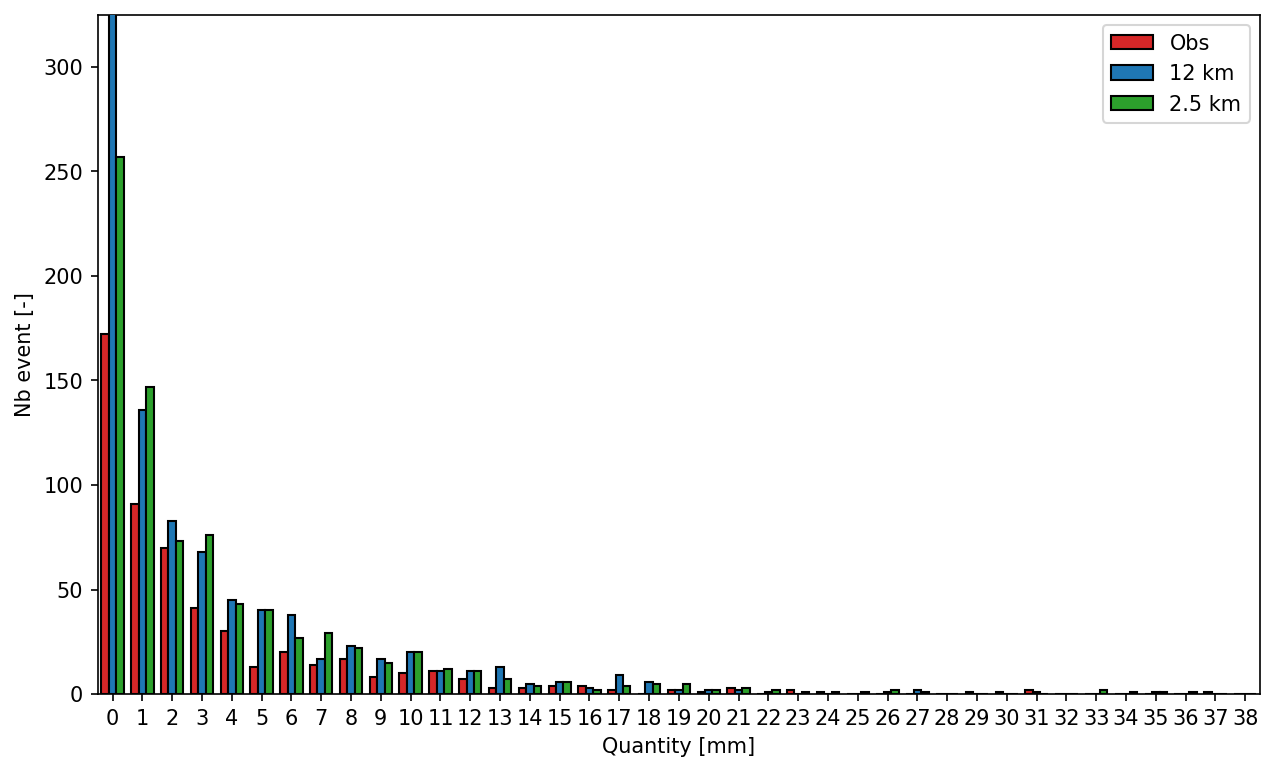

In [20]:
fig = plt.figure(facecolor='white', figsize=(10, 6), dpi=150)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax0 = fig.add_subplot(spec[0, 0])

bins = np.arange(0,40,1)

hist_obs = np.histogram(np.array(list_qty_mixte_obs), bins=bins)

hist_11km = np.histogram(np.array(list_qty_mixte_11km), bins=bins)

hist_2p5km = np.histogram(np.array(list_qty_mixte_2p5km), bins=bins)
print(hist_obs)
print(hist_11km)
print(hist_2p5km)
print(f'{np.mean(hist_obs[0]-hist_11km[0]):.2f}')
print(f'{np.mean(hist_obs[0]-hist_2p5km[0]):.2f}')
# ax0.hlines(hist_obs[0],hist_obs[-1][:-1],hist_obs[-1][1:],colors='tab:red',linewidth=3,label='Obs')
# ax0.scatter(hist_obs[-1][:-1],hist_obs[0],facecolors='tab:red', edgecolors='tab:red',zorder=99,s=15)
# ax0.scatter(hist_obs[-1][1:],hist_obs[0],facecolors='none', edgecolors='tab:red',zorder=99,s=15)
#
# ax0.hlines(hist_11km[0],hist_11km[-1][:-1],hist_11km[-1][1:],colors='tab:blue',linewidth=3,label='12 km')
# ax0.scatter(hist_11km[-1][:-1],hist_11km[0],facecolors='tab:blue', edgecolors='tab:blue',zorder=99,s=15)
# ax0.scatter(hist_11km[-1][1:],hist_11km[0],facecolors='none', edgecolors='tab:blue',zorder=99,s=15)
#
# ax0.hlines(hist_2p5km[0],hist_2p5km[-1][:-1],hist_2p5km[-1][1:],colors='tab:green',linewidth=3,label='2.5 km')
# ax0.scatter(hist_2p5km[-1][:-1],hist_2p5km[0],facecolors='tab:green', edgecolors='tab:green',zorder=99,s=15)
# ax0.scatter(hist_2p5km[-1][1:],hist_2p5km[0],facecolors='none', edgecolors='tab:green',zorder=99,s=15)

# ax0.hist(np.array(list_dt_obs_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_11km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_2p5km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
width = 0.25
ax0.bar(hist_obs[1][:-1]-width,hist_obs[0],facecolor='tab:red',edgecolor='k',zorder=999,label='Obs',width=width)
ax0.bar(hist_obs[1][:-1],hist_11km[0],facecolor='tab:blue',edgecolor='k',zorder=999,label='12 km',width=width)
ax0.bar(hist_obs[1][:-1]+width,hist_2p5km[0],facecolor='tab:green',edgecolor='k',zorder=999,label='2.5 km',width=width)
ax0.legend()
ax0.grid(False)
ax0.set_ylabel('Nb event [-]')
ax0.set_xlabel('Quantity [mm]')
ax0.set_ylim(0,325)
ax0.set_xlim(bins[0]-0.5,bins[-2]+0.5)

ax0.set_xticks(bins[:-1])

# ax0.hist()
# ax0.hist(np.array(list_dt_11km))
plt.show()

27.22
22.22
-10.00
-7.33
-14.11
-9.94


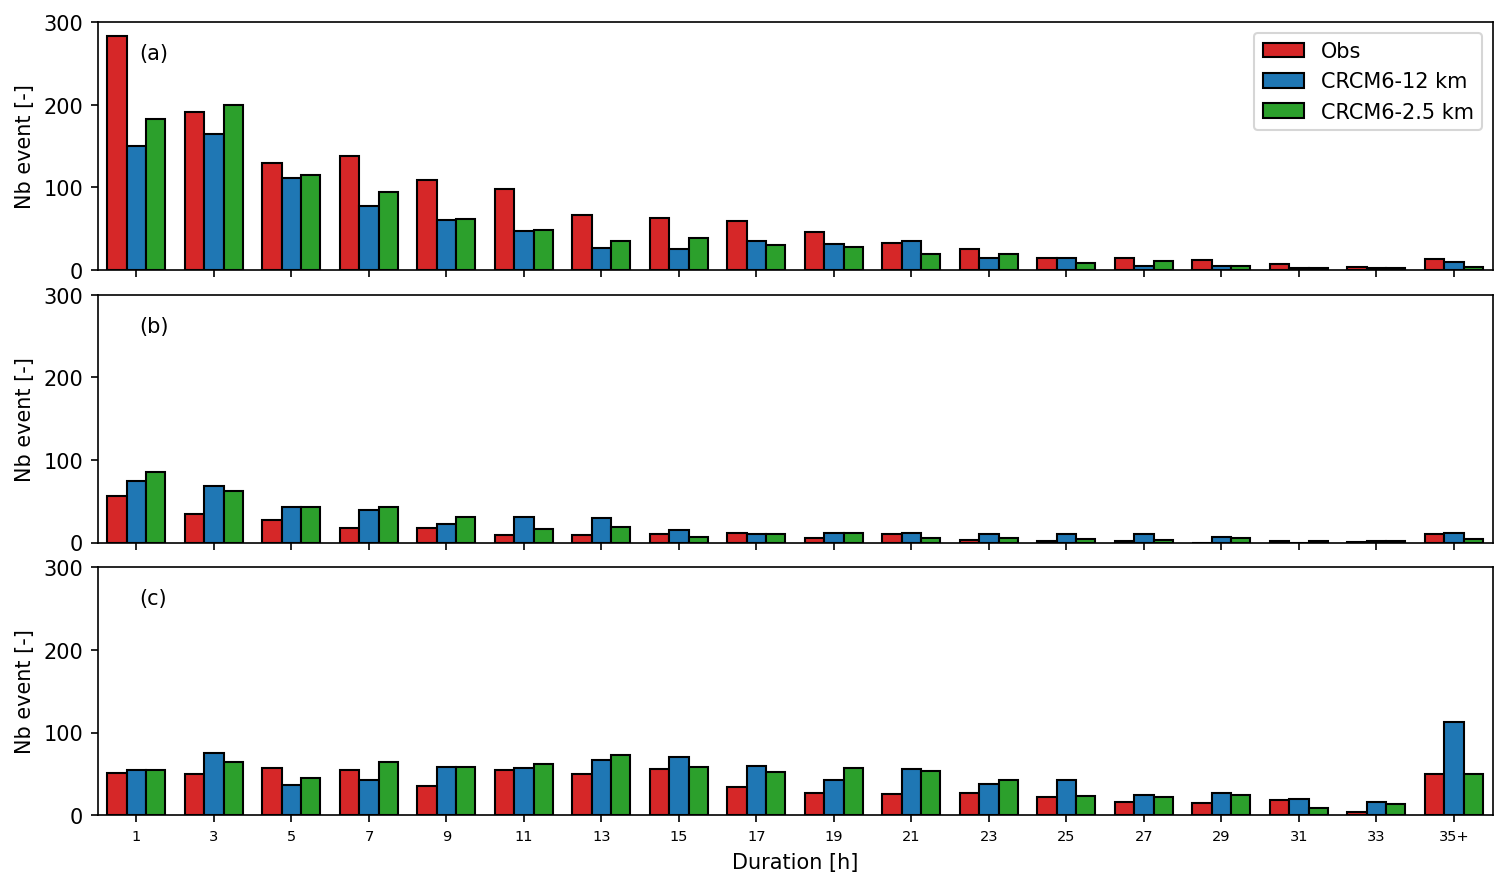

In [21]:
fig = plt.figure(facecolor='white', figsize=(12, 7), dpi=150)
spec = fig.add_gridspec(ncols=1, nrows=3)
ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])
ax2 = fig.add_subplot(spec[2, 0])
# bins = np.arange(1,89,2)
bins = np.arange(1,37,2)
bins = np.append(bins,100)

hist_obs = np.histogram(np.array(list_dt_obs_snow), bins=bins)

hist_11km = np.histogram(np.array(list_dt_11km_snow), bins=bins)

hist_2p5km = np.histogram(np.array(list_dt_2p5km_snow), bins=bins)

# ax0.hlines(hist_obs[0],hist_obs[-1][:-1],hist_obs[-1][1:],colors='tab:red',linewidth=3,label='Obs')
# ax0.scatter(hist_obs[-1][:-1],hist_obs[0],facecolors='tab:red', edgecolors='tab:red',zorder=99,s=15)
# ax0.scatter(hist_obs[-1][1:],hist_obs[0],facecolors='none', edgecolors='tab:red',zorder=99,s=15)
#
# ax0.hlines(hist_11km[0],hist_11km[-1][:-1],hist_11km[-1][1:],colors='tab:blue',linewidth=3,label='12 km')
# ax0.scatter(hist_11km[-1][:-1],hist_11km[0],facecolors='tab:blue', edgecolors='tab:blue',zorder=99,s=15)
# ax0.scatter(hist_11km[-1][1:],hist_11km[0],facecolors='none', edgecolors='tab:blue',zorder=99,s=15)
#
# ax0.hlines(hist_2p5km[0],hist_2p5km[-1][:-1],hist_2p5km[-1][1:],colors='tab:green',linewidth=3,label='2.5 km')
# ax0.scatter(hist_2p5km[-1][:-1],hist_2p5km[0],facecolors='tab:green', edgecolors='tab:green',zorder=99,s=15)
# ax0.scatter(hist_2p5km[-1][1:],hist_2p5km[0],facecolors='none', edgecolors='tab:green',zorder=99,s=15)

# ax0.hist(np.array(list_dt_obs_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_11km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_2p5km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# width = 0.25
width = 0.5
ax0.bar(hist_obs[1][:-1]-width,hist_obs[0],facecolor='tab:red',edgecolor='k',zorder=999,label='Obs',width=width)
ax0.bar(hist_obs[1][:-1],hist_11km[0],facecolor='tab:blue',edgecolor='k',zorder=999,label='CRCM6-12 km',width=width)
ax0.bar(hist_obs[1][:-1]+width,hist_2p5km[0],facecolor='tab:green',edgecolor='k',zorder=999,label='CRCM6-2.5 km',width=width)
ax0.legend()
print(f'{np.mean(hist_obs[0]-hist_11km[0]):.2f}')
print(f'{np.mean(hist_obs[0]-hist_2p5km[0]):.2f}')

hist_obs_2 = np.histogram(np.array(list_dt_obs_rain), bins=bins)

hist_11km_2 = np.histogram(np.array(list_dt_11km_rain), bins=bins)

hist_2p5km_2 = np.histogram(np.array(list_dt_2p5km_rain), bins=bins)



ax1.bar(hist_obs_2[1][:-1]-width,hist_obs_2[0],facecolor='tab:red',edgecolor='k',zorder=999,label='Obs',width=width)
ax1.bar(hist_obs_2[1][:-1],hist_11km_2[0],facecolor='tab:blue',edgecolor='k',zorder=999,label='CRCM6-12 km',width=width)
ax1.bar(hist_obs_2[1][:-1]+width,hist_2p5km_2[0],facecolor='tab:green',edgecolor='k',zorder=999,label='CRCM6-2.5 km',width=width)

print(f'{np.mean(hist_obs_2[0]-hist_11km_2[0]):.2f}')
print(f'{np.mean(hist_obs_2[0]-hist_2p5km_2[0]):.2f}')

hist_obs_3 = np.histogram(np.array(list_dt_obs_mix), bins=bins)

hist_11km_3 = np.histogram(np.array(list_dt_11km_mix), bins=bins)

hist_2p5km_3 = np.histogram(np.array(list_dt_2p5km_mix), bins=bins)



ax2.bar(hist_obs_3[1][:-1]-width,hist_obs_3[0],facecolor='tab:red',edgecolor='k',zorder=999,label='Obs',width=width)
ax2.bar(hist_obs_3[1][:-1],hist_11km_3[0],facecolor='tab:blue',edgecolor='k',zorder=999,label='CRCM6-12 km',width=width)
ax2.bar(hist_obs_3[1][:-1]+width,hist_2p5km_3[0],facecolor='tab:green',edgecolor='k',zorder=999,label='CRCM6-2.5 km',width=width)


print(f'{np.mean(hist_obs_3[0]-hist_11km_3[0]):.2f}')
print(f'{np.mean(hist_obs_3[0]-hist_2p5km_3[0]):.2f}')


for ax in [ax0,ax1,ax2]:
    ax.set_ylim(0,300)
    # ax.set_ylim(0,250)
    ax.set_xlim(0,bins[-2]+1)
    ax.set_xticks(bins[:-1])
    ax.grid(False)
    ax.set_ylabel('Nb event [-]')
    ax.tick_params(axis='x', which='major', labelsize=7)

ax2.set_xlabel('Duration [h]')

bbox = dict(boxstyle="square", fc="w",ec='white')

ax0.annotate(f'(a)', xy=(0.03, 0.85), bbox=bbox, xycoords='axes fraction', fontsize=10)

ax1.annotate(f'(b)', xy=(0.03, 0.85), bbox=bbox, xycoords='axes fraction', fontsize=10)

ax2.annotate(f'(c)', xy=(0.03, 0.85), bbox=bbox, xycoords='axes fraction', fontsize=10)

ax0.sharex(ax2)
ax0.tick_params(which="both",bottom=True,labelbottom=False)
ax1.sharex(ax2)
ax1.tick_params(which="both",bottom=True,labelbottom=False)
tick = [f'{j}' for j in bins[:-2]]
tick.append(f'{bins[-2]}+')
ax2.set_xticks(bins[:-1])
ax2.set_xticklabels(tick)
plt.subplots_adjust(hspace=0.1)
# ax0.hist()
# ax0.hist(np.array(list_dt_11km))
image_savepath = fr"/upslope/chalifour/projet_maitrise/figure_final_submission/event_per_duration_fig"
fig.savefig(image_savepath+".png", format='png', bbox_inches='tight',dpi=150)
plt.show()

ValueError: x and y must be the same size

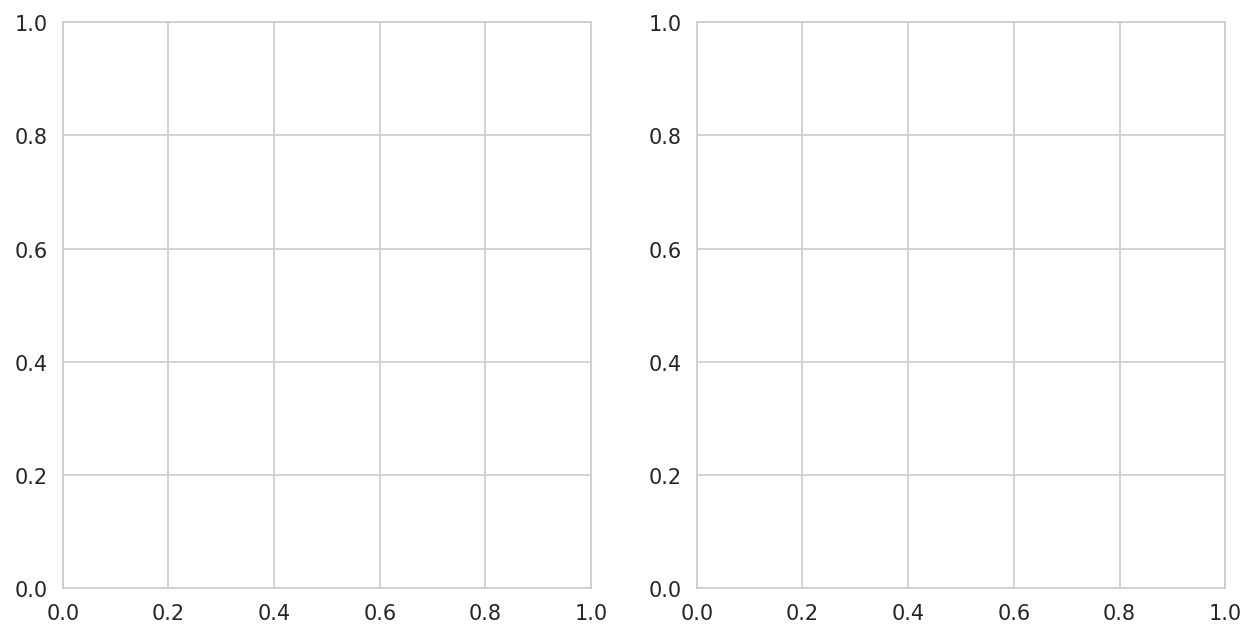

In [19]:
fig = plt.figure(facecolor='white', figsize=(10, 5), dpi=150)
spec = fig.add_gridspec(ncols=2, nrows=1)
ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
bins = np.arange(0,80,2)
# hist_obs = np.histogram(np.array(list_dt_obs_mix), bins=bins)
# hist_11km = np.histogram(np.array(list_dt_11km_mix), bins=bins)
# hist_2p5km = np.histogram(np.array(list_dt_2p5km_mix), bins=bins)



ax0.scatter(list_dt_obs_snow,list_qty_obs_snow,facecolors='tab:red', edgecolors='tab:red',zorder=99,s=15,alpha=0.5)
ax1.scatter(list_dt_obs_snow,list_qty_obs_snow,facecolors='tab:red', edgecolors='tab:red',zorder=99,s=15,alpha=0.5)
slope_obs, intercept_obs, r, p, std_err = stats.linregress(list_dt_obs_snow,list_qty_obs_snow)
ax0.plot(list_dt_obs_snow,slope_obs*np.array(list_dt_obs_snow)+intercept_obs,c='tab:red',label='Regression Obs',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax1.plot(list_dt_obs_snow,slope_obs*np.array(list_dt_obs_snow)+intercept_obs,c='tab:red',label='Regression Obs',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])


ax0.scatter(list_dt_11km_snow,list_qty_11km_snow,facecolors='tab:blue', edgecolors='tab:blue',zorder=99,s=15,alpha=0.5)

slope_11km, intercept_11km, r, p, std_err = stats.linregress(list_dt_11km_snow,list_qty_11km_snow)
ax0.plot(list_dt_11km_snow,slope_11km*np.array(list_dt_11km_snow)+intercept_11km,c='tab:blue',label='Regression 12 km ',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])



ax1.scatter(list_dt_2p5km_snow,list_qty_2p5km_snow,facecolors='tab:green', edgecolors='tab:green',alpha=0.5,s=15)
slope_2p5, intercept_2p5, r, p, std_err = stats.linregress(list_dt_2p5km_snow,list_qty_2p5km_snow)
ax1.plot(list_dt_2p5km_snow,slope_2p5*np.array(list_dt_2p5km_snow)+intercept_2p5,c='tab:green',label='Regression 2.5 km ',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
# ax0.scatter(hist_2p5km[-1][1:],hist_2p5km[0],facecolors='none', edgecolors='tab:green',zorder=99,s=15)

# ax0.hist(np.array(list_dt_obs_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_11km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_2p5km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)

# ax0.hist(np.array(list_dt_obs_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='tab:red',linewidth=2,zorder=999,label='Obs')
# ax0.hist(np.array(list_dt_11km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='tab:blue',linewidth=2,zorder=999,label='12 km')
# ax0.hist(np.array(list_dt_2p5km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='tab:green',linewidth=2,zorder=999,label='2.5 km')
ax0.legend()
ax0.grid(True)
ax0.set_xlabel('Duree [h]')
ax0.set_ylabel('Accumulation [mm]')
ax0.set_ylim(0,85)


ax1.legend()
ax1.grid(True)
ax1.set_xlabel('Duree [h]')
ax1.set_ylabel('Accumulation [mm]')
ax1.set_ylim(0,85)

ax0.set_title('Événement Solid')
ax1.set_title('Événement Solid')
# ax0.hist()
# ax0.hist(np.array(list_dt_11km))
plt.show()

In [ ]:
fig = plt.figure(facecolor='white', figsize=(10, 5), dpi=150)
spec = fig.add_gridspec(ncols=2, nrows=1)
ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
bins = np.arange(0,80,2)
# hist_obs = np.histogram(np.array(list_dt_obs_mix), bins=bins)
# hist_11km = np.histogram(np.array(list_dt_11km_mix), bins=bins)
# hist_2p5km = np.histogram(np.array(list_dt_2p5km_mix), bins=bins)


# ax0.hlines(hist_obs[0],hist_obs[-1][:-1],hist_obs[-1][1:],colors='tab:red',linewidth=3,label='Obs')

ax0.scatter(list_dt_obs_rain,list_qty_obs_rain,facecolors='tab:red', edgecolors='tab:red',zorder=99,s=15,alpha=0.5)
ax1.scatter(list_dt_obs_rain,list_qty_obs_rain,facecolors='tab:red', edgecolors='tab:red',zorder=99,s=15,alpha=0.5)
slope_obs, intercept_obs, r, p, std_err = stats.linregress(list_dt_obs_rain,list_qty_obs_rain)
ax0.plot(list_dt_obs_rain,slope_obs*np.array(list_dt_obs_rain)+intercept_obs,c='tab:red',label='Regression Obs',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax1.plot(list_dt_obs_rain,slope_obs*np.array(list_dt_obs_rain)+intercept_obs,c='tab:red',label='Regression Obs',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])


ax0.scatter(list_dt_11km_rain,list_qty_11km_rain,facecolors='tab:blue', edgecolors='tab:blue',zorder=99,s=15,alpha=0.5)

slope_11km, intercept_11km, r, p, std_err = stats.linregress(list_dt_11km_rain,list_qty_11km_rain)
ax0.plot(list_dt_11km_rain,slope_11km*np.array(list_dt_11km_rain)+intercept_11km,c='tab:blue',label='Regression 12 km ',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])



ax1.scatter(list_dt_2p5km_rain,list_qty_2p5km_rain,facecolors='tab:green', edgecolors='tab:green',alpha=0.5,s=15)
slope_2p5, intercept_2p5, r, p, std_err = stats.linregress(list_dt_2p5km_rain,list_qty_2p5km_rain)
ax1.plot(list_dt_2p5km_rain,slope_2p5*np.array(list_dt_2p5km_rain)+intercept_2p5,c='tab:green',label='Regression 2.5 km ',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
# ax0.scatter(hist_2p5km[-1][1:],hist_2p5km[0],facecolors='none', edgecolors='tab:green',zorder=99,s=15)

# ax0.hist(np.array(list_dt_obs_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_11km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_2p5km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)

# ax0.hist(np.array(list_dt_obs_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='tab:red',linewidth=2,zorder=999,label='Obs')
# ax0.hist(np.array(list_dt_11km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='tab:blue',linewidth=2,zorder=999,label='12 km')
# ax0.hist(np.array(list_dt_2p5km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='tab:green',linewidth=2,zorder=999,label='2.5 km')
ax0.legend()
ax0.grid(True)
ax0.set_xlabel('Duree [h]')
ax0.set_ylabel('Accumulation [mm]')
ax0.set_ylim(0,85)


ax1.legend()
ax1.grid(True)
ax1.set_xlabel('Duree [h]')
ax1.set_ylabel('Accumulation [mm]')
ax1.set_ylim(0,85)

ax0.set_title('Événement Liquide')
ax1.set_title('Événement Liquide')
# ax0.hist()
# ax0.hist(np.array(list_dt_11km))
plt.show()

In [ ]:
# capa

z_0=0.01 #m
d = 0.4 #m


idx_event_capa = {}

for station in list_order_stat:
    subdf = dataframe_1h_obs_capa.loc[dataframe_1h_obs_capa['filename']==station].copy()
    mask_ld = pd.concat(idx_event_stat[station]).index
    subdf['event_no'] = pd.concat(idx_event_stat[station])['event_no']
    rainEvents = subdf.groupby('event_no')
    list_wind_capa = []
    for name, group in rainEvents:

        list_wind_capa.append(group)

    rainEvents_corrected_capa = list_wind_capa

    idx_event_capa[station] = rainEvents_corrected_capa

# uqam
subdf_uqam = dataframe_capauqam.copy()
subdf_uqam['event_no'] = pd.concat(idx_event_stat['UQAM_PK'])['event_no']
rainEvents = subdf_uqam.groupby('event_no')

list_wind_capa = []
for name, group in rainEvents:

    list_wind_capa.append(group)

rainEvents_corrected_capa = list_wind_capa

idx_event_capa['UQAM_PK'] = rainEvents_corrected_capa

# momo
subdf_momo = dataframe_capamomo.copy()
subdf_momo['event_no'] = pd.concat(idx_event_stat['MOMO'])['event_no']
rainEvents = subdf_momo.groupby('event_no')

list_wind_capa = []
for name, group in rainEvents:
    list_wind_capa.append(group)

rainEvents_corrected_capa = list_wind_capa

idx_event_capa['MOMO'] = rainEvents_corrected_capa

In [ ]:
fig = plt.figure(facecolor='white', figsize=(10, 5), dpi=150)
spec = fig.add_gridspec(ncols=2, nrows=1)
ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
bins = np.arange(0,80,2)
# hist_obs = np.histogram(np.array(list_dt_obs_mix), bins=bins)
# hist_11km = np.histogram(np.array(list_dt_11km_mix), bins=bins)
# hist_2p5km = np.histogram(np.array(list_dt_2p5km_mix), bins=bins)



# define the true objective function




ax0.scatter(list_duree_mixte_obs,list_qty_mixte_obs,facecolors='tab:red', edgecolors='tab:red',zorder=99999,s=15,alpha=0.5)
ax1.scatter(list_duree_mixte_obs,list_qty_mixte_obs,facecolors='tab:red', edgecolors='tab:red',zorder=99999,s=15,alpha=0.5)
slope_obs, intercept_obs, r, p, std_err = stats.linregress(list_dt_obs_mix,list_qty_mixte_obs)
ax0.plot(list_duree_mixte_obs,slope_obs*np.array(list_duree_mixte_obs)+intercept_obs,c='tab:red',label='Regression Obs',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax1.plot(list_duree_mixte_obs,slope_obs*np.array(list_duree_mixte_obs)+intercept_obs,c='tab:red',label='Regression Obs',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])


ax0.scatter(list_duree_mixte_11km,list_qty_mixte_11km,facecolors='tab:blue', edgecolors='tab:blue',zorder=99,s=15,alpha=0.5)

slope_11km, intercept_11km, r, p, std_err = stats.linregress(list_duree_mixte_11km,list_qty_mixte_11km)
ax0.plot(list_duree_mixte_11km,slope_11km*np.array(list_duree_mixte_11km)+intercept_11km,c='tab:blue',label='Regression 12 km ',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])



ax1.scatter(list_duree_mixte_2p5km,list_qty_mixte_2p5km,facecolors='tab:green', edgecolors='tab:green',alpha=0.5,s=15)
slope_2p5, intercept_2p5, r, p, std_err = stats.linregress(list_duree_mixte_2p5km,list_qty_mixte_2p5km)
ax1.plot(list_duree_mixte_2p5km,slope_2p5*np.array(list_duree_mixte_2p5km)+intercept_2p5,c='tab:green',label='Regression 2.5 km ',zorder=999,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])

# ax0.scatter(hist_2p5km[-1][1:],hist_2p5km[0],facecolors='none', edgecolors='tab:green',zorder=99,s=15)

# ax0.hist(np.array(list_dt_obs_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_11km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)
# ax0.hist(np.array(list_dt_2p5km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='k',linewidth=0.7,zorder=-999)

# ax0.hist(np.array(list_dt_obs_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='tab:red',linewidth=2,zorder=999,label='Obs')
# ax0.hist(np.array(list_dt_11km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='tab:blue',linewidth=2,zorder=999,label='12 km')
# ax0.hist(np.array(list_dt_2p5km_mix),bins=bins,histtype='step',fc=(0,0,0,0),edgecolor='tab:green',linewidth=2,zorder=999,label='2.5 km')
ax0.legend()
ax0.grid(True)
ax0.set_xlabel('Duree [h]')
ax0.set_ylabel('Accumulation [mm]')
ax0.set_ylim(0,85)
ax0.set_xlim(0,35)

ax1.legend()
ax1.grid(True)
ax1.set_xlabel('Duree [h]')
ax1.set_ylabel('Accumulation [mm]')
ax1.set_ylim(0,85)
ax1.set_xlim(0,35)
ax0.set_title('Événement Mixte')
ax1.set_title('Événement Mixte')
# ax0.hist()
# ax0.hist(np.array(list_dt_11km))
plt.show()

In [ ]:

for stat in idx_event_stat.keys():
    list_e = idx_event_stat[stat]
    list_ecapa = idx_event_capa[stat]
    list_duration = []
    list_duration_capa = []
    list_qty = []
    list_qty_capa = []
    for event,event_capa in zip(list_e,list_ecapa):

        list_duration.append(len(event.index))

        list_duration_capa.append((event_capa.index[-1]-event_capa.index[0])/ pd.Timedelta('1 hour'))
        list_qty_capa.append(np.sum(event_capa['PR']))
        if stat != 'MOMO':
            list_qty.append(np.sum(event['precip_inst_pluvio']))

        else:
            list_qty.append(np.sum(event['precip_inst_geonor']))
    fig = plt.figure(dpi=200,facecolor='white')
    ax = plt.axes()
    bins = np.arange(0,55,5)


    bin_value = np.digitize(list_duration,bins)

    # print(np.bincount(bin_value))

    # print(len(bins),len(np.bincount(bin_value)))
    list_bin=[]
    for i in range(len(bins)):
        list_bin.append(np.count_nonzero(bin_value == i))
    # print(bin_value,list_bin)
    ax.bar(bins-5/2,list_bin,width=5,label=f'{stat}')
    # ax.scatter(list_duration, list_qty,label=f'{stat}')
    # ax.scatter(list_duration_capa, list_qty_capa,label='CaPA')
    ax.set_ylim(0,60)
    ax.set_xlim(0,50)
    ax.set_ylabel('Nb event [-]')
    ax.set_xlabel('Duration of event [h]')
    ax.legend()
    fig.savefig(
        f'/upslope/chalifour/projet_maitrise/fig/fig_analyse_event/{stat}_analyse_occurence.png',
        dpi=200, format='png', bbox_inches='tight', )  # Most backends support png, pdf,
    plt.show()

In [ ]:
list_order_stat.insert(0, 'UQAM_PK')
list_order_stat.insert(1, 'MOMO')

In [ ]:

list_frac = ['frac_liquide','frac_solide', 'frac_FZ', 'frac_mix','frac_mix_fr']
list_vsmevent=[[],[],[],[]]
list_smevent=[[],[],[],[]]
list_moyevent=[[],[],[],[]]
list_bigevent=[[],[],[],[]]
list_vbigevent=[[],[],[],[]]
list_vvbigevent=[[],[],[],[]]
for stat in list_order_stat:
    print(stat)
    event_stat = idx_event_stat[stat]
    event_era5 = idx_event_era5[stat]
    event_11km = idx_event_11km[stat]
    event_2p5km = idx_event_2p5km[stat]
    event_capa = idx_event_capa[stat]

    event_era5['precip_inst_pluvio'] = event_era5[list_frac].sum(axis=1)
    event_11km['precip_inst_pluvio'] = event_11km[list_frac].sum(axis=1)
    event_2p5km['precip_inst_pluvio'] = event_2p5km[list_frac].sum(axis=1)

    list_era5 = []
    list_11km = []
    list_2p5km = []
    list_stat = []
    list_capa = []
    var ='precip_inst_pluvio'
    # [0, 0.2[, [0.2, 1[; [1, 2[; [2, 5[;[5, 10[; [10, 25[; [25, 50[; and [50, ‘[
    for name , group in event_stat.groupby('event_no'):

        prcp_stat = group[var]

        prcp_capa = event_capa.loc[event_capa['event_no']==name,'PR']
        prcp_era5 = event_era5.loc[event_era5['event_no']==name,var]
        prcp_11km = event_11km.loc[event_11km['event_no']==name,var]
        prcp_2p5km = event_2p5km.loc[event_2p5km['event_no']==name,var]

        list_stat.append(prcp_stat)
        list_era5.append(prcp_era5)
        list_11km.append(prcp_11km)
        list_2p5km.append(prcp_2p5km)
        list_capa.append(prcp_capa)

    prcp_era5_all = pd.concat(list_era5)
    prcp_11km_all = pd.concat(list_11km)
    prcp_2p5km_all = pd.concat(list_2p5km)
    prcp_sta_all = pd.concat(list_stat)

    vsmprcp_m = prcp_sta_all.between(0, 0.2)
    smprcp_m = prcp_sta_all.between(0.2, 1)
    moyprcp_m = prcp_sta_all.between(1, 2)
    bigprcp_m = prcp_sta_all.between(2,5)
    vbigprcp_m = prcp_sta_all.between(5,10)
    vvbigprcp_m = prcp_sta_all.between(10,25)


    list_mask = [vsmprcp_m,smprcp_m,moyprcp_m,bigprcp_m,vbigprcp_m,vvbigprcp_m]

    for i,df_lookat in enumerate([prcp_era5_all,prcp_sta_all,prcp_11km_all,prcp_2p5km_all]):

        list_vsmevent[i].extend(df_lookat.loc[vsmprcp_m].values)
        list_smevent[i].extend(df_lookat.loc[smprcp_m].values)
        list_moyevent[i].extend(df_lookat.loc[moyprcp_m].values)
        list_bigevent[i].extend(df_lookat.loc[bigprcp_m].values)
        list_vbigevent[i].extend(df_lookat.loc[vbigprcp_m].values)
        list_vvbigevent[i].extend(df_lookat.loc[vvbigprcp_m].values)

list_for_score=[list_vsmevent,list_smevent,list_moyevent,list_bigevent,list_vbigevent,list_vvbigevent]
list_for_score_norm = []

for list in list_for_score:
    array = np.array(list)/np.array(list)
    list_for_score_norm.append(np.nan_to_num(array))




In [ ]:
def FBI(obs,sim):
    sim[sim ==1] = 2
    list_tot = sim+obs

    vp = np.sum(list_tot ==3)
    fp = np.sum(list_tot ==2)
    vn = np.sum(list_tot ==0)
    fn = np.sum(list_tot ==1)

    fbi = (vp+vn)/(vp+fp)
    return fbi

def ETS(obs,sim):
    # frac diu forecast qui est correct
    sim[sim ==1] = 2
    list_tot = sim+obs

    vp = np.sum(list_tot ==3)
    fp = np.sum(list_tot ==2)
    vn = np.sum(list_tot ==0)
    fn = np.sum(list_tot ==1)

    n = len(list_tot)
    ar = ((vp+vn)*(vp+fp)) / n
    ets = (vp+ar)/(vp+vn+fp - ar)
    return ets

def POD(obs,sim):
    # frac diu forecast qui est correct
    sim[sim ==1] = 2
    list_tot = sim+obs

    vp = np.sum(list_tot ==3)
    fp = np.sum(list_tot ==2)
    vn = np.sum(list_tot ==0)
    fn = np.sum(list_tot ==1)


    pod = (vp)/(vp+fp)
    return pod


def FAR(obs,sim):
    # frac diu forecast qui est correct
    sim[sim ==1] = 2
    list_tot = sim+obs

    vp = np.sum(list_tot ==3)
    fp = np.sum(list_tot ==2)
    vn = np.sum(list_tot ==0)
    fn = np.sum(list_tot ==1)


    far = (vn)/(vp+vn)
    return far

def PC(obs,sim):
    # frac diu forecast qui est correct
    sim[sim ==1] = 2
    list_tot = sim+obs


    vp = np.sum(list_tot ==3)
    fp = np.sum(list_tot ==2)
    vn = np.sum(list_tot ==0)
    fn = np.sum(list_tot ==1)


    far = (vp+vn)/len(list_tot)
    return far

In [ ]:
nb_bin = len(list_for_score_norm)
for i in range(0,nb_bin):
    lstat = list_for_score_norm[i][0]
    lera5 = list_for_score_norm[i][1]
    l11km = list_for_score_norm[i][2]
    l2p5km = list_for_score_norm[i][3]
    print()
    print(PC(lstat,l11km))
    print(PC(lstat,l2p5km))
